# Table of Contents


1. Introduction


2. Dataset

  - 2.1 Loading Dataset
  - 2.2 Data Cleaning
  - 2.3 Data transformation
  - 2.4 Missing Values
  - 2.5 Imputing missing values
  
  
3. Feature Engineering
  - 3.1 Feature generation from categorical variables
  - 3.2 One-hot Encoding
  

4. Descriptive Analysis
  - 4.1 Correlation
  - 4.2 Visualizations
  - 4.3 Wordcloud
  

5. Predictive Model
  - 5.1 Train-test split
  - 5.2 Deploy Model
  

6. Model Evaluation
  - 6.2 Feature Importance

# 1. Introduction

When travelling abroad, (or at least when we used to) accommondation is one of the first we need to consider. A lot of factors can affect us but there are some more important if we want to maximize our traveling experience. This data file examines data from Airbnb listings in Athens, Greece. We will focus on factors like host reviews, apartment types, geographical availability and more metrics to make predictions and draw conclusions. Our analysis is trying to make some useful insight out of them.

At the end of this notebook, we will able to determine:

##### Which factors are affecting the price of an Airbnb listing? Can we predict the price?

In this project, I will perform a descriptive and exploratory analysis of the data, in order to understand how the phenomena of each variable behave individually and transversely, in addition to to generate hypotheses useful for future decision-making. The whole analysis will follow a simple and direct structure, well detailed in all topics.

### Importing Libraries

In [1]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

'''Seaborn and Matplotlib Visualization'''
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib

'''Geospatial Visualizations'''
import folium
import folium.plugins
from folium.plugins import HeatMap

'''NLP - WordCloud'''
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# 2. Dataset

This dataset has been optained from Airbnb. Data we use was scraped in different time stamps. I gathered 8 individual scrape data and merged them together. 

## 2.1 Loading Dataset

In [2]:
# Reading our dataframes.
df1 = pd.read_csv("input/listings December 2020.csv", low_memory=False)
df2 = pd.read_csv("input/listings Octomber 2020.csv", low_memory=False)
df3 = pd.read_csv("input/listings July 2020.csv", low_memory=False)
df4 = pd.read_csv("input/listings April 2020.csv", low_memory=False)
df5 = pd.read_csv("input/listings December 2019.csv", low_memory=False)
df6 = pd.read_csv("input/listings Octomber 2019.csv", low_memory=False)
df7 = pd.read_csv("input/listings July 2019.csv", low_memory=False)
df8 = pd.read_csv("input/listings April 2019.csv", low_memory=False)

In [3]:
# Each of our seperate csv files contains a lot of information.
print('df1 shape:', df1.shape)

df1 shape: (9413, 74)


In [4]:
# Compile our list of dataframes.
raw_data_frames = [df1, df2, df3, df4, df5, df6, df7, df8]

In [5]:
# concatenate our DataFrames in a single along rows -> We specify the axis parameter as 0.
# Since our df is going to be big, it's good to set some keys for navigating through data.
raw_data = pd.concat(raw_data_frames, keys=['December 2020', 'Octomber 2020', 'July 2020',
                                            'April 2020', 'December 2019', 'Octomber 2019', 'July 2019', 
                                            'April 2019'], axis=0)
raw_data

id                            listing_url  \
December 2020 0        10595     https://www.airbnb.com/rooms/10595   
              1        10990     https://www.airbnb.com/rooms/10990   
              2        10993     https://www.airbnb.com/rooms/10993   
              3        10995     https://www.airbnb.com/rooms/10995   
              4        27262     https://www.airbnb.com/rooms/27262   
...                      ...                                    ...   
April 2019    9656  33819692  https://www.airbnb.com/rooms/33819692   
              9657  33820145  https://www.airbnb.com/rooms/33820145   
              9658  33821757  https://www.airbnb.com/rooms/33821757   
              9659  33821833  https://www.airbnb.com/rooms/33821833   
              9660  33822443  https://www.airbnb.com/rooms/33822443   

                       scrape_id last_scraped  \
December 2020 0     2.020120e+13   12/24/2020   
              1     2.020120e+13   12/24/2020   
              2     2.020120e+13   12/24/2020   
              3     2.020120e+13   12/24/2020   
              4     2.020120e+13   12/24/2020   
...                          ...          ...   
April 2019    9656  2.019041e+13   2019-04-13   
              9657  2.019041e+13   2019-04-13   
              9658  2.019041e+13   2019-04-13   
              9659  2.019041e+13   2019-04-13   
              9660  2.019041e+13   2019-04-13   

                                                              name  \
December 2020 0                96m2, 3BR, 2BA, Metro, WI-FI etc...   
              1       Athens Quality Apartments - Deluxe Apartment   
              2                 Athens Quality Apartments - Studio   
              3     AQA-No2 1-bedroom, smart tv, fiber connection,   
              4                 54m2, 1-br, cable tv, wi-fi, metro   
...                                                            ...   
April 2019    9656                 Lysicrates Monument - Athens 33   
              9657           Bright and Stylish Exarchia apartment   
              9658                                        Athens21   
              9659                                  Tower of Winds   
              9660         Beautiful and modern Pagkrati Apartment   

                                                          description  \
December 2020 0     Athens Furnished Apartment No6 is 3-bedroom ap...   
              1     Athens Quality Apartments - Deluxe apartment i...   
              2     The Studio is an <br />-excellent located <br ...   
              3     AQA No2 is 1-bedroom apartment (47m2), on the ...   
              4     Big 1-bedroom apartment that can accommodate 4...   
...                                                               ...   
April 2019    9656  "Athens 33" is a newly renovated building in N...   
              9657  Newly renovated, this two bedroom apartment is...   
              9658  Athens 21 is centrally located right next to M...   
              9659  "Athens 33" is a newly renovated building in N...   
              9660            Beautiful and modern Pagkrati Apartment   

                                                neighborhood_overview  \
December 2020 0     Ampelokipi district is nice multinational and ...   
              1     Ampelokipi district is nice multinational and ...   
              2     Ampelokipi district is nice multinational and ...   
              3     Ampelokipi district is nice multinational and ...   
              4                                                   NaN   
...                                                               ...   
April 2019    9656  Plaka is the historical area of Athens with gr...   
              9657  The neighborhood has many things to offer, wit...   
              9658  The name Athens21 is given by its position, “2...   
              9659  Plaka is the historical area of Athens with gr...   
              9660                                             

In [6]:
print('raw_data shape:', raw_data.shape)

raw_data shape: (84905, 108)


There are 108 columns in our raw_data dataframe. Most of these columns contain data generated from scrapping or dummies for data we dont need. Such columns are not valuable for our analysis (listing_url, scrape_id and more) and therefore we will filter them out.

## 2.2 Data Cleaning

By observing the dataset and each of the columns, I selectively choosed a number of variables that seemed useful for our analysis.
Lets do some data cleaning.

In [7]:
# List with columns we use.
columns = ['id', 'host_id', 'last_scraped', 'host_name', 'name', 'description', 'neighbourhood',
       'latitude', 'longitude', 'room_type','price', 'square_feet', 'bathrooms', 'bedrooms', 'beds',
       'last_review', 'accommodates', 'guests_included', 'number_of_reviews', 'review_scores_rating', 
       'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
       'review_scores_location', 'review_scores_value', 'has_availability', 'availability_30', 
       'availability_60', 'availability_90', 'availability_365', 'review_scores_value', 'host_since', 
       'host_response_time', 'host_response_rate', 'host_is_superhost', 'security_deposit',
       'cleaning_fee','extra_people','requires_license', 'is_business_travel_ready']

df = raw_data[columns]
print('df:', df.shape)

df: (84905, 41)


Now we have 41 columns.

We would like to focus on the properties that are available regularly. We can do this by flitering out the properties which are not availiable in the past recent months.

In [8]:
df = df[df['has_availability'] == 't']
print('df:', df.shape)

df: (84903, 41)


Out of 84905 listings, only 2 were not available. Lets go deeper by filtering out the listings which are unavailable in the past 1, 2, 3 months and 1 year respectively..

In [9]:
# drop rows which are unavailable.
df = df[df['availability_30'] != 0]
df = df[df['availability_60'] != 0]
df = df[df['availability_90'] != 0]
df = df[df['availability_365'] != 0]

# and their corresponding columns.
df.drop(['has_availability'], axis=1, inplace=True)

print('df:', df.shape)

df: (67682, 40)


At this point, we would like to focus on the valid property only.

We are only gonna keep the properties with reviews from previous guests to verify the authenticity.

In [10]:
df = df[df['number_of_reviews'] != 0]
df = df[df['review_scores_rating'].notnull()]
print('df:', df.shape)

df: (52162, 40)


In [11]:
#dropping columns that could be unethical to use for our future data exploration and predictions
df.drop(['name','id','host_name','last_review', 'host_since'], axis=1, inplace=True)

We are dropping this data because there should be no reasoning to continue with data analysis and machine learning towards specific individuals based on their names. 
##### Those names are assigned to actual humans and therefore are unimportant to us.

In [12]:
# We are also going to drop the description of our listings.
# But first, we're going to save it in a seperate dataframe for Wordcloud.

df1 = df['description']
df.drop(['description'], axis=1, inplace=True)

In [13]:
df1

December 2020  1       Athens Quality Apartments - Deluxe apartment i...
               2       The Studio is an <br />-excellent located <br ...
               3       AQA No2 is 1-bedroom apartment (47m2), on the ...
               4       Big 1-bedroom apartment that can accommodate 4...
               5       TOP 5 REASONS to stay here<br />⭐️Don't waste ...
                                             ...                        
April 2019     9548    Sweet, clean, cosy apartment, close to the cit...
               9553    Often hotels and apartments end up neglecting ...
               9567    Located at the Acropolis area in " Koukaki " n...
               9575    This brand-new, chic decorated studio is the p...
               9582    A cosy studio appartment where you can find an...
Name: description, Length: 52162, dtype: object

In [14]:
df.shape

(52162, 34)

In [15]:
df = df[df.neighbourhood.notnull()]

## 2.3 Data transformation

Some important columns in our dataset contain wrong values.

### price

In [16]:
df.price.head()

December 2020  1    $38.00 
               2    $32.00 
               3    $45.00 
               5    $40.00 
               7    $40.00 
Name: price, dtype: object

In [17]:
# Extracting prices from the table.
price = df['price']
prices=[]

In [18]:
# we replace the $ and , symbol with space.
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')

# we astype the values of price column to float insted of object.
df['price'] = df['price'].astype(float)
df.price.head()

December 2020  1    38.0
               2    32.0
               3    45.0
               5    40.0
               7    40.0
Name: price, dtype: float64

### host_response_rate

In [19]:
df.host_response_rate.head()

December 2020  1    100%
               2    100%
               3    100%
               5    100%
               7     25%
Name: host_response_rate, dtype: object

In [20]:
# we replace the $ symbol with space.
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')

# we astype the values of price column to float insted of object.
df['host_response_rate'] = df['host_response_rate'].astype(float)
df.host_response_rate.head()

December 2020  1    100.0
               2    100.0
               3    100.0
               5    100.0
               7     25.0
Name: host_response_rate, dtype: float64

In [21]:
df.shape

(49449, 34)

## 2.4 Missing Values

How many missing data points do we have?

If we take a closer look to our data, we will observe that we do have some missing values..

### Summary of Dataset

In [22]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n        :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 49449
Columns  : 34

Features :
        : ['host_id', 'last_scraped', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'square_feet', 'bathrooms', 'bedrooms', 'beds', 'accommodates', 'guests_included', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'review_scores_value', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'security_deposit', 'cleaning_fee', 'extra_people', 'requires_license', 'is_business_travel_ready']

Missing values    : 152254

Unique values :  
 host_id                        6192
last_scraped                     16
neighbourhood                   179
latitude                       4934
longitude                      4888
room_type                         4
price                           339
sq

It is common to have a lot of missing values, especially in large datasets. Lets see our missed values in depth.

In [23]:
# Number of missing values in each column of our df.
missing_val_count_by_column = (df.isnull().sum())

print(missing_val_count_by_column[missing_val_count_by_column > 0])

price                           6331
square_feet                    49020
bathrooms                       9075
bedrooms                        7076
beds                            6371
guests_included                 9075
review_scores_accuracy            67
review_scores_cleanliness         67
review_scores_checkin             69
review_scores_communication       67
review_scores_location            69
review_scores_value               77
review_scores_value               77
host_response_time              4040
host_response_rate              4040
host_is_superhost                 11
security_deposit               17149
cleaning_fee                   12348
extra_people                    9075
requires_license                9075
is_business_travel_ready        9075
dtype: int64


### Visualizing the missing values

We will visualize the missing values so we can approach our dataset better.

The following graph is a representation of how our dataset looks like. 

Text(0.5, 1.0, 'Missing values visualized')

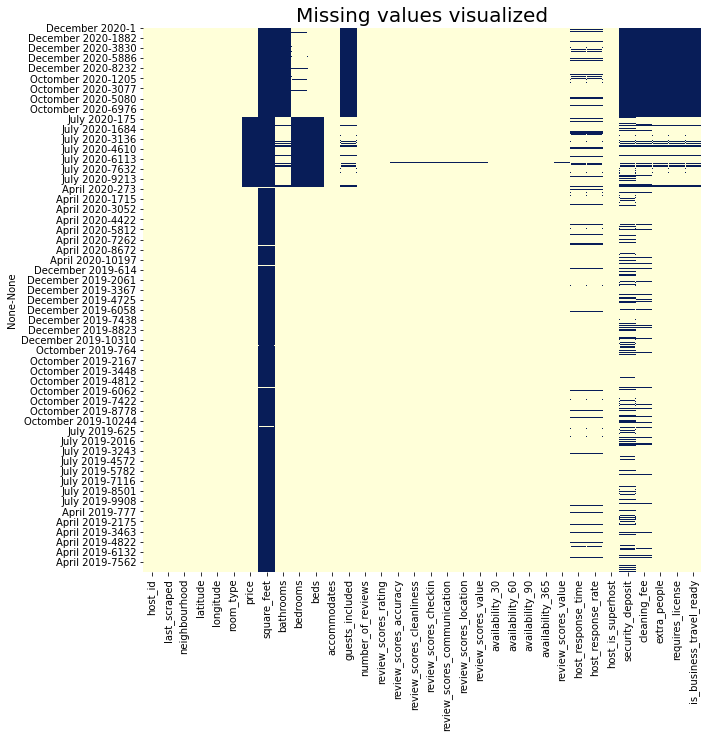

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()

# Add title
plt.title("Missing values visualized", fontsize=20)

The dark horizontal lines show the missing values in our data set. We have more missing values in the columns price, square_feet, bathrooms, bedroom, beds and some categorical columns such as cleaning_fee.

### Droping  features having too many missing values

Although square_feet  would be an important factor, we will remove it from the data.

The following columns: guests_included, security_deposit, cleaning_fee, extra_people, requires_license, is_business_travel_ready are also gonna get dropped since they are categorical and we cannot make some value out of them.

In [25]:
df.drop(['square_feet', 'guests_included', 'security_deposit', 'cleaning_fee', 'extra_people', 
         'requires_license', 'is_business_travel_ready'],
        axis=1, inplace=True)

In [26]:
df.shape

(49449, 27)

In [27]:
# drop duplicate columns.
df = df.loc[:,~df.columns.duplicated()]

In [28]:
# since we a few missing values we drop them now
df = df[df.host_response_time.notnull()]
df = df[df.host_response_rate.notnull()]
df = df[df.host_is_superhost.notnull()]

In [29]:
df.head()

host_id last_scraped           neighbourhood  latitude  \
December 2020 1    37177   12/24/2020  Athens, Attica, Greece  37.98903   
              2    37177   12/24/2020  Athens, Attica, Greece  37.98888   
              3    37177   12/24/2020  Athens, Attica, Greece  37.98903   
              5   121318   12/23/2020  Athens, Attica, Greece  37.97680   
              7   146553   12/24/2020  Athens, Αττική, Greece  38.00853   

                 longitude        room_type  price  bathrooms  bedrooms  beds  \
December 2020 1   23.76448  Entire home/apt   38.0        NaN       1.0   1.0   
              2   23.76473  Entire home/apt   32.0        NaN       NaN   1.0   
              3   23.76448  Entire home/apt   45.0        NaN       1.0   2.0   
              5   23.72924  Entire home/apt   40.0        NaN       1.0   2.0   
              7   23.72938  Entire home/apt   40.0        NaN       2.0   2.0   

                 ...  review_scores_communication  review_scores_location  \
December 2020 1  ...                         10.0                    10.0   
              2  ...                         10.0                    10.0   
              3  ...                         10.0                    10.0   
              5  ...                         10.0                    10.0   
              7  ...                         10.0                     9.0   

                 review_scores_value  availability_30  availability_60  \
December 2020 1                 10.0                4               34   
              2                 10.0               28               58   
              3                 10.0                3               13   
              5                 10.0               29               59   
              7                 10.0               30               60   

                 availability_90  availability_365  host_response_time  \
December 2020 1               64                72      within an hour   
              2               88               218      within an hour   
              3               43               318      within an hour   
              5               89               256      within an hour   
              7               90               365  a few days or more   

                 host_response_rate  host_is_superhost  
December 2020 1               100.0                  t  
              2               100.0                  t  
              3               100.0                  t  
              5               100.0                  t  
              7                25.0                  f  

[5 rows x 26 columns]

### Lets see our missing values again.

In [30]:
#make a list of the variables that contain missing values
vars_with_na=[var for var in df.columns if df[var].isnull().sum()>1]

#print the variable name and the percentage of missing values 
for var in vars_with_na:
    print(var,np.round(df[var].isnull().mean(),3),'% missing values')

price 0.117 % missing values
bathrooms 0.174 % missing values
bedrooms 0.133 % missing values
beds 0.118 % missing values
review_scores_accuracy 0.001 % missing values
review_scores_cleanliness 0.001 % missing values
review_scores_checkin 0.001 % missing values
review_scores_communication 0.001 % missing values
review_scores_location 0.001 % missing values
review_scores_value 0.001 % missing values


Since price is going to be our predicting value, it is important to know how missing values affect price.

### Relation between missing values and the features we are going to use.

We will visualize the impact missing values have on our target namely price.

- 1 indicates that value was missing.
- 0 indicates that we have a value. 

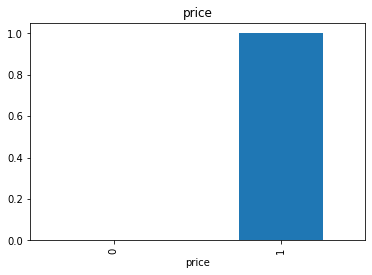

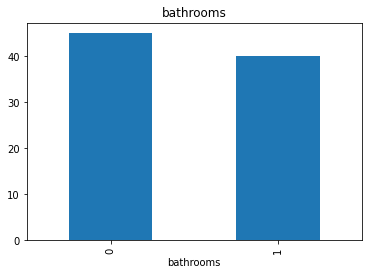

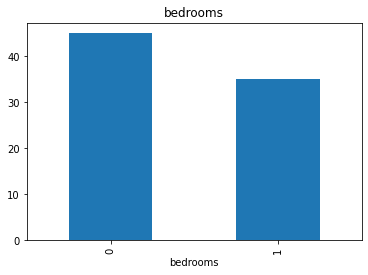

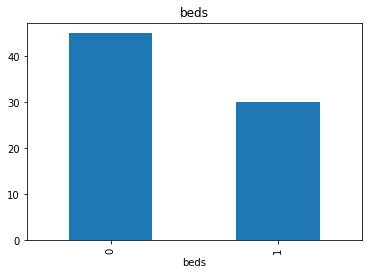

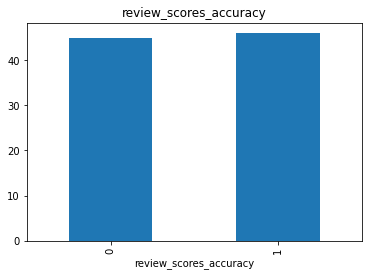

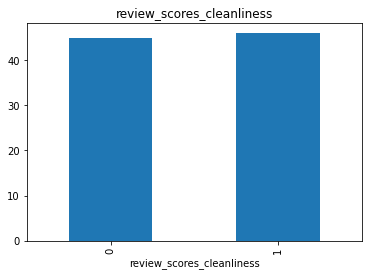

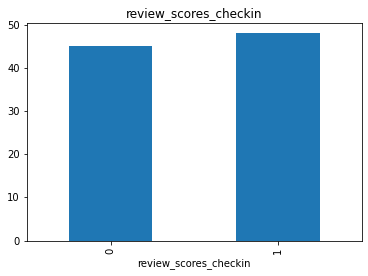

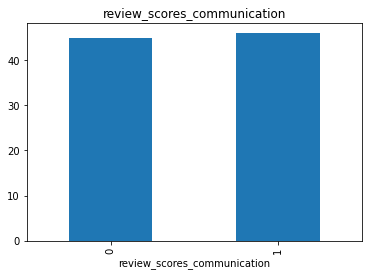

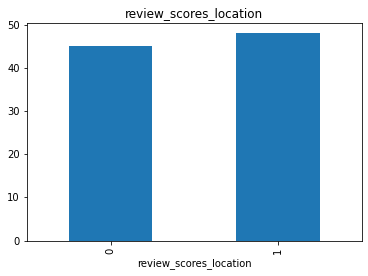

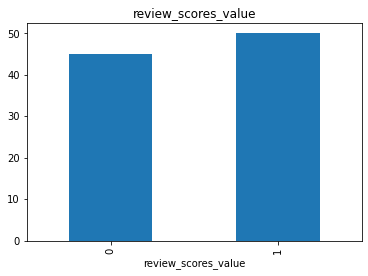

In [31]:
def analyse_na_value(df,var):
    df=df.copy()
    
    #Let's make a variable that indicates 1 if the observation was missing or Zero otherwise 
    df[var]=np.where(df[var].isnull(),1,0)
    
    #Let's calculate the mean SalePrice where the information is missing or present 
    df.groupby(var)['price'].median().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_with_na:
    analyse_na_value(df,var)

Price is more for the rows were the data is missing.
These plots are generally used to find out if the features missing have an impact on the predicated value.
If they have an impact on the predicted variable then we have to either input the missing values in case of numerical variable. In case of categorical variables we can create a new label.

<Figure size 1080x720 with 0 Axes>

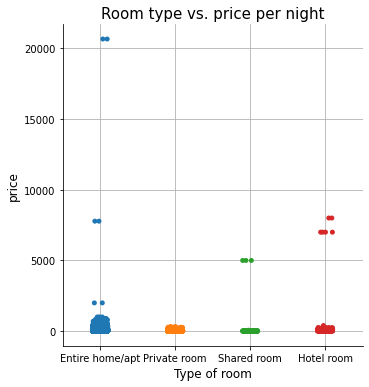

In [32]:
#catplot room type and price
plt.figure(figsize=(15,10))
sns.catplot(x="room_type", y="price", data=df);
plt.ioff()

# show title.
plt.title("Room type vs. price per night", fontsize=15)

# renaming axis x and y.
plt.xlabel('Type of room', fontsize=12)
plt.ylabel('price', fontsize=12)

# Show the grid.
plt.grid()

pass

We can see from the scatter plot that we first need to clean up the file. There are some anomalies here (implausible values). For that reason we are going to replace listings with price more than 5000 per night with n/a.

In [33]:
df["price"].mask(df["price"].between(5000, 25000), inplace=True) #.mask() replaces values with NaN. .between() selects the values

## 2.5 Imputing missing values

Imputation fills in the missing values with some number. We can fill in the mean value along each column. Although it's simple, filling in the mean value generally performs quite well (but this varies by dataset).

In [34]:
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
df.iloc[:,:] = mean_imputer.fit_transform(df)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 45409 entries, ('December 2020', 1) to ('April 2019', 9582)
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      45409 non-null  int64  
 1   last_scraped                 45409 non-null  object 
 2   neighbourhood                45409 non-null  object 
 3   latitude                     45409 non-null  float64
 4   longitude                    45409 non-null  float64
 5   room_type                    45409 non-null  object 
 6   price                        45409 non-null  float64
 7   bathrooms                    45409 non-null  float64
 8   bedrooms                     45409 non-null  float64
 9   beds                         45409 non-null  float64
 10  accommodates                 45409 non-null  int64  
 11  number_of_reviews            45409 non-null  int64  
 12  review_scores_rating         45409 non-n

In [36]:
df.head()

host_id last_scraped           neighbourhood  latitude  \
December 2020 1    37177   12/24/2020  Athens, Attica, Greece  37.98903   
              2    37177   12/24/2020  Athens, Attica, Greece  37.98888   
              3    37177   12/24/2020  Athens, Attica, Greece  37.98903   
              5   121318   12/23/2020  Athens, Attica, Greece  37.97680   
              7   146553   12/24/2020  Athens, Αττική, Greece  38.00853   

                 longitude        room_type  price  bathrooms  bedrooms  beds  \
December 2020 1   23.76448  Entire home/apt   38.0        1.0       1.0   1.0   
              2   23.76473  Entire home/apt   32.0        1.0       1.0   1.0   
              3   23.76448  Entire home/apt   45.0        1.0       1.0   2.0   
              5   23.72924  Entire home/apt   40.0        1.0       1.0   2.0   
              7   23.72938  Entire home/apt   40.0        1.0       2.0   2.0   

                 ...  review_scores_communication  review_scores_location  \
December 2020 1  ...                         10.0                    10.0   
              2  ...                         10.0                    10.0   
              3  ...                         10.0                    10.0   
              5  ...                         10.0                    10.0   
              7  ...                         10.0                     9.0   

                 review_scores_value  availability_30  availability_60  \
December 2020 1                 10.0                4               34   
              2                 10.0               28               58   
              3                 10.0                3               13   
              5                 10.0               29               59   
              7                 10.0               30               60   

                 availability_90  availability_365  host_response_time  \
December 2020 1               64                72      within an hour   
              2               88               218      within an hour   
              3               43               318      within an hour   
              5               89               256      within an hour   
              7               90               365  a few days or more   

                 host_response_rate  host_is_superhost  
December 2020 1               100.0                  t  
              2               100.0                  t  
              3               100.0                  t  
              5               100.0                  t  
              7                25.0                  f  

[5 rows x 26 columns]

Great! We can proceed to the next step. :) 

# 3. Feature Engineering


In this section we will generate even more data from our feature columns. Creating new features from already existing data is one of the best ways to improve our model.

### date

We will add new columns namely hour, day, month and year by splitting date.

In [37]:
df.rename({'last_scraped': 'date'}, axis=1, inplace=True)

In [38]:
df

host_id        date           neighbourhood  latitude  \
December 2020 1         37177  12/24/2020  Athens, Attica, Greece  37.98903   
              2         37177  12/24/2020  Athens, Attica, Greece  37.98888   
              3         37177  12/24/2020  Athens, Attica, Greece  37.98903   
              5        121318  12/23/2020  Athens, Attica, Greece  37.97680   
              7        146553  12/24/2020  Athens, Αττική, Greece  38.00853   
...                       ...         ...                     ...       ...   
April 2019    9548  147205490  2019-04-13              Ambelokipi  37.98772   
              9553  152449611  2019-04-13                Kolonaki  37.97938   
              9567   68395729  2019-04-13                 Koukaki  37.96322   
              9575   29905613  2019-04-13                   Plaka  37.97802   
              9582  247363519  2019-04-13                Larissis  37.99184   

                    longitude        room_type  price  bathrooms  bedrooms  \
December 2020 1      23.76448  Entire home/apt   38.0        1.0       1.0   
              2      23.76473  Entire home/apt   32.0        1.0       1.0   
              3      23.76448  Entire home/apt   45.0        1.0       1.0   
              5      23.72924  Entire home/apt   40.0        1.0       1.0   
              7      23.72938  Entire home/apt   40.0        1.0       2.0   
...                       ...              ...    ...        ...       ...   
April 2019    9548   23.76271  Entire home/apt   34.0        1.0       1.0   
              9553   23.74613  Entire home/apt   65.0        1.0       1.0   
              9567   23.72285  Entire home/apt   35.0        1.0       0.0   
              9575   23.72921  Entire home/apt   41.0        1.0       0.0   
              9582   23.72908  Entire home/apt   38.0        1.0       1.0   

                    beds  ...  review_scores_communication  \
December 2020 1      1.0  ...                         10.0   
              2      1.0  ...                         10.0   
              3      2.0  ...                         10.0   
              5      2.0  ...                         10.0   
              7      2.0  ...                         10.0   
...                  ...  ...                          ...   
April 2019    9548   3.0  ...                         10.0   
              9553   2.0  ...                         10.0   
              9567   1.0  ...                         10.0   
              9575   1.0  ...                         10.0   
              9582   1.0  ...                         10.0   

                    review_scores_location  review_scores_value  \
December 2020 1                       10.0                 10.0   
              2                       10.0                 10.0   
              3                       10.0                 10.0   
              5                       10.0                 10.0   
              7                        9.0                 10.0   
...                                    ...                  ...   
April 2019    9548                    10.0                 10.0   
              9553                    10.0                  8.0   
              9567                    10.0                 10.0   
              9575                    10.0                 10.0   
              9582                    10.0                 10.0   

                    availability_30  availability_60  availability_90  \
December 2020 1                   4               34               64   
              2                  28               58               88   
              3                   3               13               43   
              5                  29               59               89   
              7                  30               60               90   
...                             ...              ...              ...   
April 2019    9548               12               30               60   
  

We can see that our date column is not properly formated. Lets fix this.

In [39]:
# infer the datetime properly.
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [40]:
# separating date column into day month and year.
df = df.assign(hour=df.date.dt.hour,
               day=df.date.dt.day,
               month=df.date.dt.month,
               year=df.date.dt.year)

# get rid of date column.
df.drop(['date'], axis=1, inplace=True)

# and hour since we don't need it.
df.drop(['hour'], axis=1, inplace=True)

In [41]:
df

host_id           neighbourhood  latitude  longitude  \
December 2020 1         37177  Athens, Attica, Greece  37.98903   23.76448   
              2         37177  Athens, Attica, Greece  37.98888   23.76473   
              3         37177  Athens, Attica, Greece  37.98903   23.76448   
              5        121318  Athens, Attica, Greece  37.97680   23.72924   
              7        146553  Athens, Αττική, Greece  38.00853   23.72938   
...                       ...                     ...       ...        ...   
April 2019    9548  147205490              Ambelokipi  37.98772   23.76271   
              9553  152449611                Kolonaki  37.97938   23.74613   
              9567   68395729                 Koukaki  37.96322   23.72285   
              9575   29905613                   Plaka  37.97802   23.72921   
              9582  247363519                Larissis  37.99184   23.72908   

                          room_type  price  bathrooms  bedrooms  beds  \
December 2020 1     Entire home/apt   38.0        1.0       1.0   1.0   
              2     Entire home/apt   32.0        1.0       1.0   1.0   
              3     Entire home/apt   45.0        1.0       1.0   2.0   
              5     Entire home/apt   40.0        1.0       1.0   2.0   
              7     Entire home/apt   40.0        1.0       2.0   2.0   
...                             ...    ...        ...       ...   ...   
April 2019    9548  Entire home/apt   34.0        1.0       1.0   3.0   
              9553  Entire home/apt   65.0        1.0       1.0   2.0   
              9567  Entire home/apt   35.0        1.0       0.0   1.0   
              9575  Entire home/apt   41.0        1.0       0.0   1.0   
              9582  Entire home/apt   38.0        1.0       1.0   1.0   

                    accommodates  ...  availability_30  availability_60  \
December 2020 1                4  ...                4               34   
              2                2  ...               28               58   
              3                4  ...                3               13   
              5                4  ...               29               59   
              7                5  ...               30               60   
...                          ...  ...              ...              ...   
April 2019    9548             5  ...               12               30   
              9553             4  ...               27               32   
              9567             2  ...                2               14   
              9575             3  ...               15               23   
              9582             4  ...               25               55   

                    availability_90  availability_365  host_response_time  \
December 2020 1                  64                72      within an hour   
              2                  88               218      within an hour   
              3                  43               318      within an hour   
              5                  89               256      within an hour   
              7                  90               365  a few days or more   
...                             ...               ...                 ...   
April 2019    9548               60               335      within an hour   
              9553               58               237      within an hour   
              9567               33               294      within an hour   
              9575               43               314      within an hour   
              9582               85               360      within an hour   

                    host_response_rate  host_is_superhost  day  month  year  
December 2020 1                  100.0                  t   24     12  2020  
              2                  100.0                  t   24     12  2020  
              3                  100.0                  t   24     12  2020  
              5                  100.0                  t   23     12 

### host_id

let's see what hosts (IDs) have the most listings on Airbnb platform in Athens.

In [42]:
top_host=df.host_id.value_counts().head(10)
top_host

29927830     607
748818       436
135482892    434
1621474      426
1418201      357
112527018    345
2089542      325
20104194     286
182755179    257
55670751     242
Name: host_id, dtype: int64

## 3.1 Feature generation from  categorical variables.

For our categorical features we will work with one-hot encoding. We create new columns indicating the presence (or absence) of each possible value in the original data. 

In [43]:
# Get a list of categorical variables.
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['neighbourhood', 'room_type', 'host_response_time', 'host_is_superhost']


In [44]:
print('Unique values in `room_type ` column:', list(df.room_type.unique()))

Unique values in `room_type ` column: ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']


In [45]:
print('Unique values in `host_response_time` column:', list(df.host_response_time.unique()))

Unique values in `host_response_time` column: ['within an hour', 'a few days or more', 'within a few hours', 'within a day']


In [46]:
print('Unique values in `host_is_superhost` column:', list(df.host_is_superhost.unique()))

Unique values in `host_is_superhost` column: ['t', 'f']


## 3.2 One-hot Encoding

In [47]:
# Get one hot encoding of room_type.
one_hot1 = pd.get_dummies(df['room_type'])
# Drop column B as it is now encoded

# Join the encoded df
df = df.join(one_hot1)

In [48]:
# Get one hot encoding of host_response_time.
one_hot2 = pd.get_dummies(df['host_response_time'])
# Drop column B as it is now encoded

# Join the encoded df
df = df.join(one_hot2)

In [49]:
df

host_id           neighbourhood  latitude  longitude  \
December 2020 1         37177  Athens, Attica, Greece  37.98903   23.76448   
              2         37177  Athens, Attica, Greece  37.98888   23.76473   
              3         37177  Athens, Attica, Greece  37.98903   23.76448   
              5        121318  Athens, Attica, Greece  37.97680   23.72924   
              7        146553  Athens, Αττική, Greece  38.00853   23.72938   
...                       ...                     ...       ...        ...   
April 2019    9548  147205490              Ambelokipi  37.98772   23.76271   
              9553  152449611                Kolonaki  37.97938   23.74613   
              9567   68395729                 Koukaki  37.96322   23.72285   
              9575   29905613                   Plaka  37.97802   23.72921   
              9582  247363519                Larissis  37.99184   23.72908   

                          room_type  price  bathrooms  bedrooms  beds  \
December 2020 1     Entire home/apt   38.0        1.0       1.0   1.0   
              2     Entire home/apt   32.0        1.0       1.0   1.0   
              3     Entire home/apt   45.0        1.0       1.0   2.0   
              5     Entire home/apt   40.0        1.0       1.0   2.0   
              7     Entire home/apt   40.0        1.0       2.0   2.0   
...                             ...    ...        ...       ...   ...   
April 2019    9548  Entire home/apt   34.0        1.0       1.0   3.0   
              9553  Entire home/apt   65.0        1.0       1.0   2.0   
              9567  Entire home/apt   35.0        1.0       0.0   1.0   
              9575  Entire home/apt   41.0        1.0       0.0   1.0   
              9582  Entire home/apt   38.0        1.0       1.0   1.0   

                    accommodates  ...  month  year  Entire home/apt  \
December 2020 1                4  ...     12  2020                1   
              2                2  ...     12  2020                1   
              3                4  ...     12  2020                1   
              5                4  ...     12  2020                1   
              7                5  ...     12  2020                1   
...                          ...  ...    ...   ...              ...   
April 2019    9548             5  ...      4  2019                1   
              9553             4  ...      4  2019                1   
              9567             2  ...      4  2019                1   
              9575             3  ...      4  2019                1   
              9582             4  ...      4  2019                1   

                    Hotel room  Private room  Shared room  a few days or more  \
December 2020 1              0             0            0                   0   
              2              0             0            0                   0   
              3              0             0            0                   0   
              5              0             0            0                   0   
              7              0             0            0                   1   
...                        ...           ...          ...                 ...   
April 2019    9548           0             0            0                   0   
              9553           0             0            0                   0   
              9567           0             0            0                   0   
              9575           0             0            0                   0   
              9582           0             0            0                   0   

                    within a day  within a few hours  within an hour  
December 2020 1                0                   0               1  
              2                0                   0               1  
              3                0                   0               1  
              5                0                   0               1  
              7            

Our dataframe is ready for further analysis and model training :)

# 4. Descriptive Analysis

In statistics, exploratory data analysis is an approach to the analysis of data sets in order to summarize their main characteristics, often with visual methods.

## 4.1 Correlation

Correlation refers to how close two variables are to having a linear relationship with each other. Features with high correlation (1) are more linearly dependent and hence have almost the same effect on the dependent variable. 
Let's have a look at the correlation matrix.

In [50]:
cor = df.corr()
cor

,host_id,latitude,longitude,price,bathrooms,bedrooms,beds,accommodates,number_of_reviews,review_scores_rating,...,month,year,Entire home/apt,Hotel room,Private room,Shared room,a few days or more,within a day,within a few hours,within an hour
host_id,1.000000,0.052478,-0.019397,-0.044842,-0.035363,-0.030579,0.007542,-0.024602,-0.283974,-0.017311,...,0.043163,0.048920,0.020393,0.054584,-0.057644,0.038062,-0.000599,-0.015875,-0.031598,0.035143
latitude,0.052478,1.000000,0.189874,-0.117853,-0.018105,-0.006784,0.010900,-0.032074,-0.090259,-0.075376,...,-0.014063,-0.016746,-0.047036,-0.005425,0.056011,-0.004231,0.029196,0.034209,0.031412,-0.054291
longitude,-0.019397,0.189874,1.000000,-0.037274,-0.012631,-0.022751,-0.031489,-0.049646,-0.082560,0.007597,...,-0.005595,-0.005162,0.031805,-0.023298,-0.011745,-0.049999,0.028010,0.035116,0.038546,-0.060284
price,-0.044842,-0.117853,-0.037274,1.000000,0.438757,0.481931,0.388105,0.432028,-0.083326,0.065261,...,-0.000761,-0.057957,0.102551,0.015072,-0.108686,-0.047997,-0.013743,0.007325,0.025665,-0.020978
bathrooms,-0.035363,-0.018105,-0.012631,0.438757,1.000000,0.496902,0.376475,0.485677,-0.051661,0.003889,...,-0.072819,-0.076440,-0.052067,0.030791,0.033215,0.041113,-0.018624,-0.001954,0.014263,-0.004828
bedrooms,-0.030579,-0.006784,-0.022751,0.481931,0.496902,1.000000,0.718637,0.718421,-0.071077,-0.008861,...,0.020652,-0.061609,0.103898,-0.036779,-0.091303,-0.029380,-0.012438,0.001583,0.008254,-0.003838
beds,0.007542,0.010900,-0.031489,0.388105,0.376475,0.718637,1.000000,0.745233,-0.061417,-0.067579,...,0.007157,-0.122276,0.100937,-0.029270,-0.112355,0.050833,-0.017054,-0.000764,0.000405,0.005351
accommodates,-0.024602,-0.032074,-0.049646,0.432028,0.485677,0.718421,0.745233,1.000000,-0.056663,-0.040443,...,-0.013136,-0.014002,0.199613,-0.043055,-0.194494,-0.031746,-0.028025,-0.014157,-0.001630,0.018064
number_of_reviews,-0.283974,-0.090259,-0.082560,-0.083326,-0.051661,-0.071077,-0.061417,-0.056663,1.000000,0.082374,...,0.031032,0.059895,0.016217,-0.036892,0.006175,-0.028223,-0.049035,-0.068445,-0.070543,0.112036
review_scores_rating,-0.017311,-0.075376,0.007597,0.065261,0.003889,-0.008861,-0.067579,-0.040443,0.082374,1.000000,...,-0.005538,0.010106,0.054678,0.007768,-0.053937,-0.040507,-0.051813,-0.026508,-0.004238,0.034591


This matrix can give us more insights if we analyze the details.. To do this, we are going to deploy a heatmap. 

The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph. The goal of the heatmap is to provide a colored visual summary of information.

Text(0.5, 1.0, 'Features correlation heatmap')

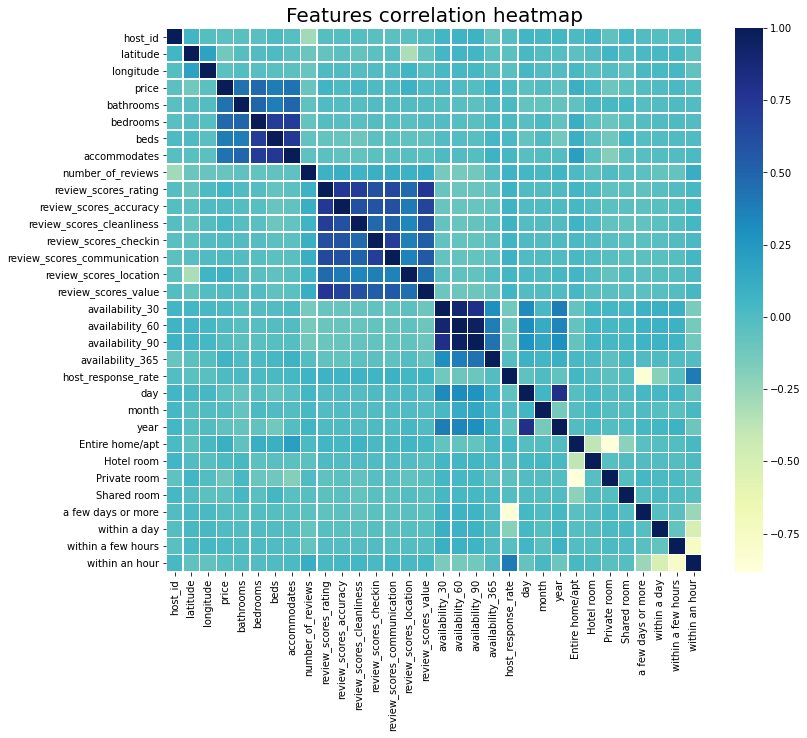

In [51]:
# Set the width and height of the figure
plt.figure(figsize=(12,10))
cor
sns.heatmap(cor, linewidths=.3, cmap="YlGnBu")

# Add title
plt.title("Features correlation heatmap", fontsize=20)

From the above matrix, we can see some patterns on our data and therefore some features have correlation (for example, ). I decided to leave all the attributes and let our model to sort them by importance.

Lets go even deeper...

## 4.2 Visualizations

### host_id
Let's see which hosts (IDs) have the most listings on Athens Airbnb.

In [52]:
df["host_id"].value_counts().head(10)

29927830     607
748818       436
135482892    434
1621474      426
1418201      357
112527018    345
2089542      325
20104194     286
182755179    257
55670751     242
Name: host_id, dtype: int64

In [53]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,29927830,607
1,748818,436
2,135482892,434
3,1621474,426
4,1418201,357
5,112527018,345
6,2089542,325
7,20104194,286
8,182755179,257
9,55670751,242


In [1]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')

viz_1.set_title('Hosts with the most listings in Athens')

viz_1.set_ylabel('Count of listings')

viz_1.set_xlabel('Host IDs')

plt.grid()

viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

NameError: name 'sns' is not defined

- Host with "29927830" ID Number has the most listings with 607 number of listings.

- There is a good distribution between top 10 hosts with the most listings. 

### Room types


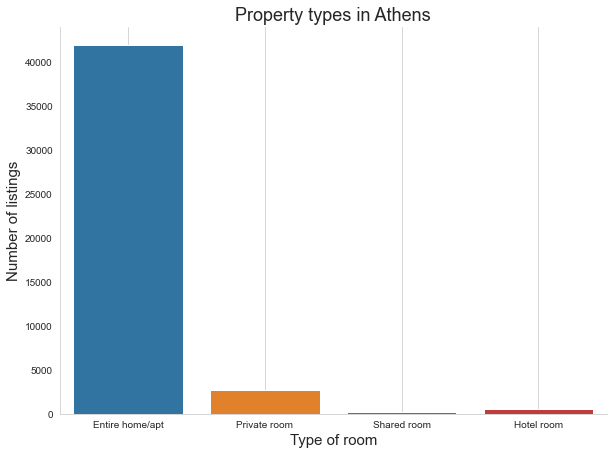

In [83]:
sns.catplot(x='room_type', kind='count' ,data=df)
fig = plt.gcf()
fig.set_size_inches(9, 6)

# show title.
plt.title('Property types in Athens', fontsize=18)

# renaming axis x and y.
plt.xlabel('Type of room', fontsize=15)
plt.ylabel('Number of listings', fontsize=15)

# Show the grid.
plt.grid()

plt.show()

Most of the listings are for an entire appartment which is common for airbnb platform.

### Room type vs. price per night

<Figure size 1080x720 with 0 Axes>

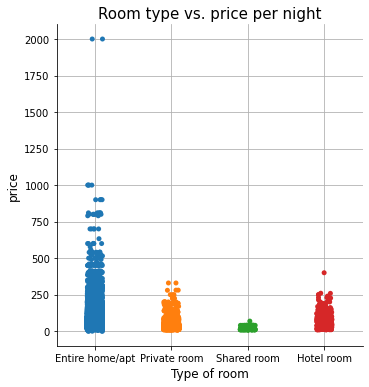

In [56]:
#catplot room type and price
plt.figure(figsize=(15,10))
sns.catplot(x="room_type", y="price", data=df);
plt.ioff()

# show title.
plt.title("Room type vs. price per night", fontsize=15)

# renaming axis x and y.
plt.xlabel('Type of room', fontsize=12)
plt.ylabel('price', fontsize=12)

# Show the grid.
plt.grid()

pass

### Accommodates (number of people) 

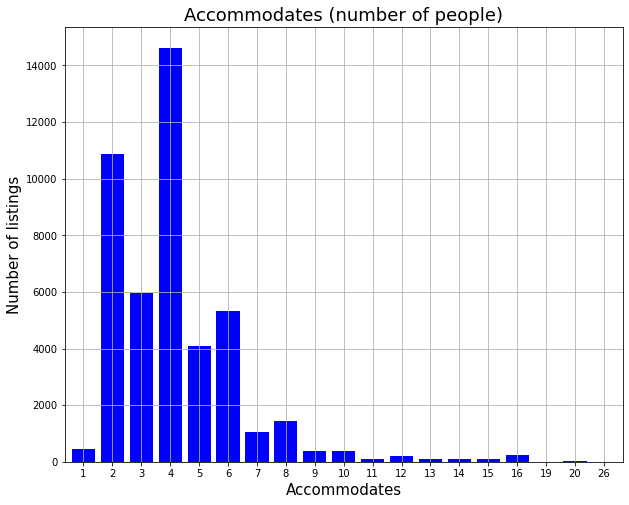

In [57]:
feq=df['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=.8, rot=0)

# show title.
plt.title("Accommodates (number of people)", fontsize=18)

# renaming axis x and y.
plt.ylabel('Number of listings', fontsize=15)
plt.xlabel('Accommodates', fontsize=15)

# Show the grid.
plt.grid()

plt.show()

Most listings are for 4 people and then for 2. In addition, Airbnb uses a maximum of 16 guests per listing.

### Price per night scatter based on lat and long

<Figure size 720x432 with 0 Axes>

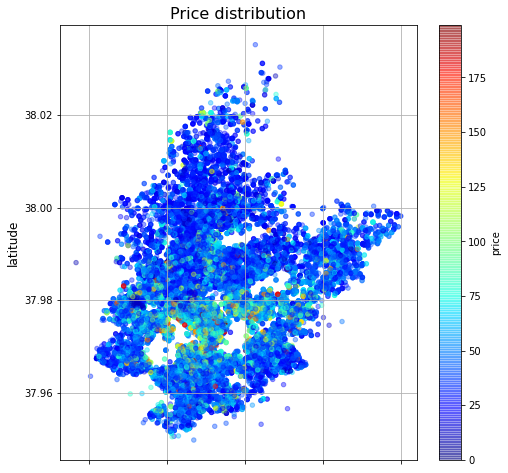

In [58]:
plt.figure(figsize=(10,6));
sub_6=df[df.price<200];
viz_4=sub_6.plot(kind='scatter', x='longitude',y='latitude', c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(8,8));

# show title.
plt.title("Price distribution", fontsize=16)

# renaming axis x and y.
plt.ylabel('latitude', fontsize=12)
plt.xlabel('longitude', fontsize=12)

# Show the grid.
plt.grid()

pass

Red color dots are the apartment or rooms with higher price with a maximum of 200 euros per night.

### Lets See the listings distribution in a Heat Map

In [59]:
m=folium.Map([37.983810,23.727539],zoom_start=11)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

The highest Density areas are marked in red and lowest density areas are marked in blue color. 

In other words, the locations around Athens city centre are the most popular while the suburbs tend to be less popular.

### Longitude and latitude

D:\xrist\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\xrist\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

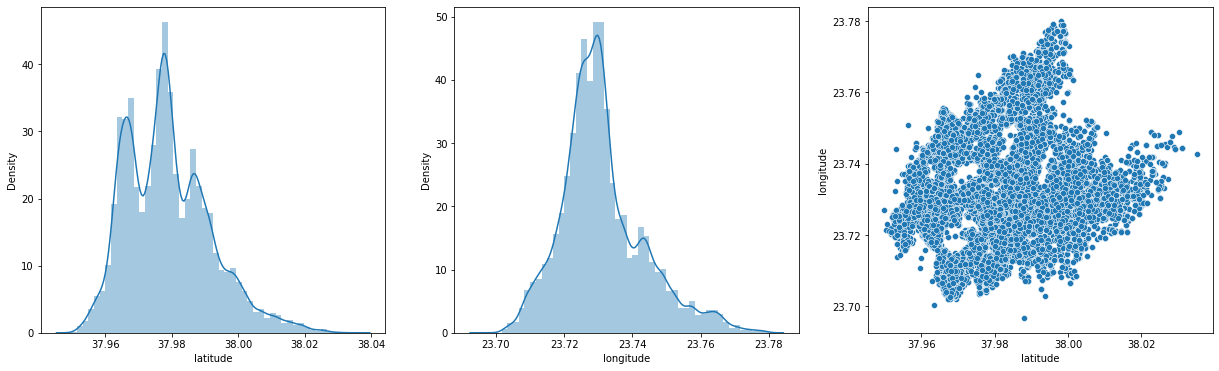

In [60]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(df['latitude'], ax=axes[0])
sns.distplot(df['longitude'], ax=axes[1])
sns.scatterplot(x= df['latitude'], y=df['longitude'])

Longitude and latitude are somewhat correlated with each other. This is because the locations of properties tend to come from clusters.

## 4.3 Wordcloud

<Figure size 720x432 with 0 Axes>

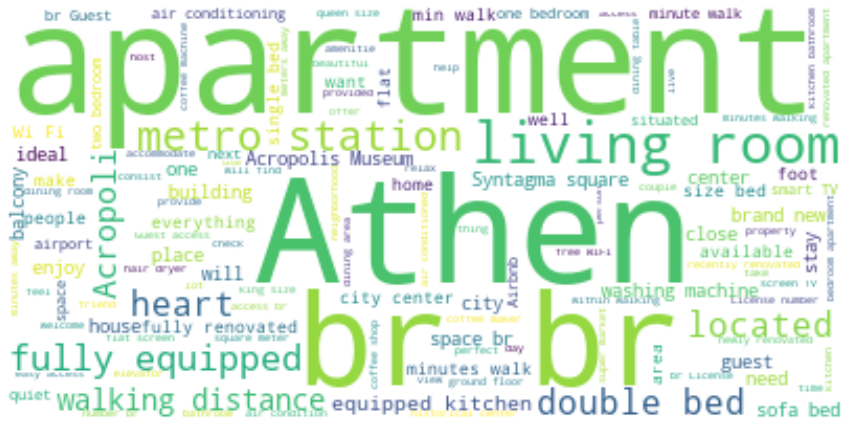

In [61]:
# Word cloud.
text = " ".join(str(each) for each in df1)

# Create and generate a word cloud image.
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))

# Display the generated image.
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
pass

Our word cloud shows the words that are more often used in the description of these listings.

We can see most of the words are related to the characterestics of the apt, place and the experince in the room.

## 5. Predictive Model

Base on input (features) we need to predict determine the (target) price. To solve this problem we will deploy a Random Forest Reggressor.


### Random Forest

Consists of a number of individual decision trees that operate as an ensemble. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. Random forest makes decision by taking the majority vote.

Lets first prepare our features and target.


### Target

In [62]:
# We can pull out a variable with dot-notation. This single column is stored in a Series. 
# This Series is broadly like a DataFrame with only a single column of data.
# We'll use the dot notation to select the column we want to predict, which is called the prediction target.

# By convention, the prediction target is called y.

y = df.price
y.head()

December 2020  1    38.0
               2    32.0
               3    45.0
               5    40.0
               7    40.0
Name: price, dtype: float64

### Features

In [63]:
df.columns

Index(['host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'price', 'bathrooms', 'bedrooms', 'beds', 'accommodates',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'day', 'month', 'year',
       'Entire home/apt', 'Hotel room', 'Private room', 'Shared room',
       'a few days or more', 'within a day', 'within a few hours',
       'within an hour'],
      dtype='object')

In [64]:
model_features = ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'accommodates',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'host_response_rate', 'day', 'month', 'year',
       'Entire home/apt', 'Hotel room', 'Private room', 'Shared room',
       'a few days or more', 'within a day', 'within a few hours']

In [65]:
# By convention, this data is called X.
X = df[model_features]

In [66]:
X.columns

Index(['latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds',
       'accommodates', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'host_response_rate', 'day', 'month', 'year', 'Entire home/apt',
       'Hotel room', 'Private room', 'Shared room', 'a few days or more',
       'within a day', 'within a few hours'],
      dtype='object')

In [67]:
# Let's quickly review the data we'll be using to predict house prices.
X.describe()

,latitude,longitude,bathrooms,bedrooms,beds,accommodates,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,...,day,month,year,Entire home/apt,Hotel room,Private room,Shared room,a few days or more,within a day,within a few hours
count,45409.000000,45409.000000,45409.000000,45409.000000,45409.000000,45409.000000,45409.000000,45409.000000,45409.000000,45409.000000,...,45409.000000,45409.000000,45409.000000,45409.000000,45409.000000,45409.000000,45409.000000,45409.000000,45409.000000,45409.000000
mean,37.978989,23.731095,1.184071,1.401682,2.103614,4.163756,49.910084,95.261578,9.760400,9.663437,...,17.593561,8.064150,2019.414698,0.924090,0.011980,0.060076,0.003854,0.012398,0.044485,0.095950
std,0.012724,0.012231,0.482293,0.850389,1.579296,2.224150,68.020446,7.210615,0.678484,0.750371,...,4.839575,3.014435,0.492675,0.264857,0.108797,0.237631,0.061960,0.110657,0.206171,0.294526
min,37.949770,23.696750,0.000000,0.000000,0.000000,1.000000,1.000000,20.000000,2.000000,2.000000,...,6.000000,4.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.968550,23.723570,1.000000,1.000000,1.000000,3.000000,6.000000,94.000000,10.000000,10.000000,...,13.000000,4.000000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.977720,23.729340,1.000000,1.000000,2.000000,4.000000,23.000000,97.000000,10.000000,10.000000,...,17.000000,7.000000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.986890,23.736990,1.000000,2.000000,3.000000,5.000000,67.000000,100.000000,10.000000,10.000000,...,21.000000,10.000000,2020.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.035180,23.779920,10.000000,14.000000,22.000000,26.000000,714.000000,100.000000,10.000000,10.000000,...,30.000000,12.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Our X dataframe has different value ranges. We will normalize the data using the package sklearn and its associated preprocessing utilities.

In [68]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
normData = pd.DataFrame(scaler.transform(X))

In [69]:
# When we convert to DataFrame, we need to specify the desired columns and index.
normData = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
X = normData

In [70]:
X.head()

latitude  longitude  bathrooms  bedrooms      beds  \
December 2020 1  0.459665   0.814356        0.1  0.071429  0.045455   
              2  0.457909   0.817362        0.1  0.071429  0.045455   
              3  0.459665   0.814356        0.1  0.071429  0.090909   
              5  0.316473   0.390646        0.1  0.071429  0.090909   
              7  0.687976   0.392329        0.1  0.142857  0.090909   

                 accommodates  number_of_reviews  review_scores_rating  \
December 2020 1          0.12           0.060309                0.9750   
              2          0.04           0.074334                0.9625   
              3          0.12           0.030856                0.9500   
              5          0.12           0.636746                0.9500   
              7          0.16           0.098177                0.9250   

                 review_scores_accuracy  review_scores_cleanliness  ...  \
December 2020 1                   1.000                      1.000  ...   
              2                   1.000                      1.000  ...   
              3                   1.000                      1.000  ...   
              5                   1.000                      1.000  ...   
              7                   0.875                      0.875  ...   

                      day  month  year  Entire home/apt  Hotel room  \
December 2020 1  0.750000    1.0   1.0              1.0         0.0   
              2  0.750000    1.0   1.0              1.0         0.0   
              3  0.750000    1.0   1.0              1.0         0.0   
              5  0.708333    1.0   1.0              1.0         0.0   
              7  0.750000    1.0   1.0              1.0         0.0   

                 Private room  Shared room  a few days or more  within a day  \
December 2020 1           0.0          0.0                 0.0           0.0   
              2           0.0          0.0                 0.0           0.0   
              3           0.0          0.0                 0.0           0.0   
              5           0.0          0.0                 0.0           0.0   
              7           0.0          0.0                 1.0           0.0   

                 within a few hours  
December 2020 1                 0.0  
              2                 0.0  
              3                 0.0  
              5                 0.0  
              7                 0.0  

[5 rows x 29 columns]

## 5.1 Train-test split

I'm going to split the data into a test set and a training set. I will hold out the test set until the very end and use the error on those data as an unbiased estimate of how my models did.

I might perform a further split later on the training set into training set proper and a validation set or I might cross-validate.

In [71]:
# split data into training and validation data, for both features and target.
# The split is based on a random number generator.
# Supplying a numeric value to the random_state argument guarantees we get the same split every time we run this script.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (36327, 29)
Dimensions of the training target vector: (36327,)
Dimensions of the test feature matrix: (9082, 29)
Dimensions of the test target vector: (9082,)


## 5.2 Deploy Model

In [73]:
#defining our model.
forest = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)

#fiting our model to test data.
forest.fit(X_train, y_train)

#make predictions.
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [74]:
print('Our predictions are :',y_test_pred)

Our predictions are : [17.404 51.216 41.388 ... 73.98  43.83  28.64 ]


# 6. Model Evaluation

There are many metrics for summarizing model quality, We'll start with one called Mean Squared Error (also called MSE).

In [75]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MSE train: 85.420, test: 641.525


MSE is the square of the average error in each term, while root MSE is its absolute value.

In [76]:
print('Root MSE:', mean_squared_error(y_train, y_train_pred)**(1/2))

Root MSE: 9.242273370509043


Our RMSE is almost 9 meaning that our Regressor is wrong by that much euros on average.

In [77]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_test_pred.flatten()}).head(20)

print('Sample of our wrong predictions:')
error_airbnb.head(5)

Sample of our wrong predictions:


,Actual Values,Predicted Values
0,14.0,17.404
1,40.0,51.216
2,35.0,41.388
3,30.0,38.332
4,40.0,41.854


## Our predictions visualized

D:\xrist\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


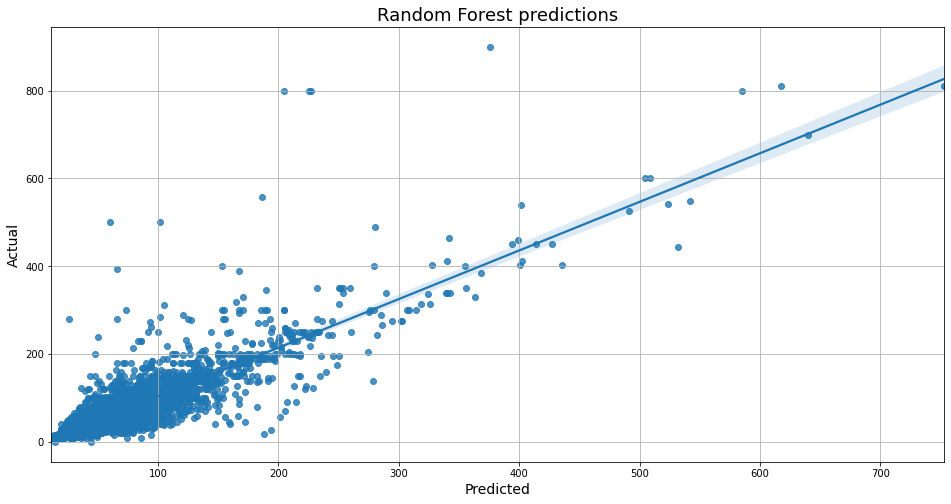

In [78]:
plt.figure(figsize=(16,8))
sns.regplot(y_test_pred,y_test)

# show title.
plt.title("Random Forest predictions", fontsize=18)

# renaming axis x and y.
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

# Show the grid.
plt.grid()

plt.show()

The accuracy of our model gets affected by lot of outliers in our dataset.

How significant is this with respect to the range of prices we are seeing? To see that let's plot RMSE as a boundary around the median price.

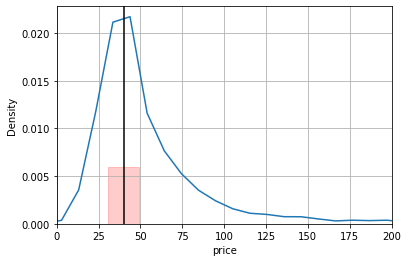

In [79]:
root_mse = mean_squared_error(y_train, y_train_pred)**(1/2)

import matplotlib.patches as patches

sns.kdeplot(y)
ax = plt.gca()
ax.set_xlim([0, 200])
plt.axvline(y.median(), c='black')
ax.add_patch(
    patches.Rectangle((y.median() - root_mse, 0), 2*root_mse, 0.006,
                      color='r', alpha=0.2))
# Show the grid.
plt.grid()

That's around... average! A look at our R-squared, which tells us the percentage of the data's variance explained by the model, confirms that.

In [80]:
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

R^2 train: 0.965, test: 0.754


Our R^2 on test data is 75,4 %.. This is our model's accuracy.

I was hoping for better results but price is difficult to classify given our limited variables..

## 6.1 Feature importance

For even better understanding of our data and how our model works, we can calculate and visualize feature importance!

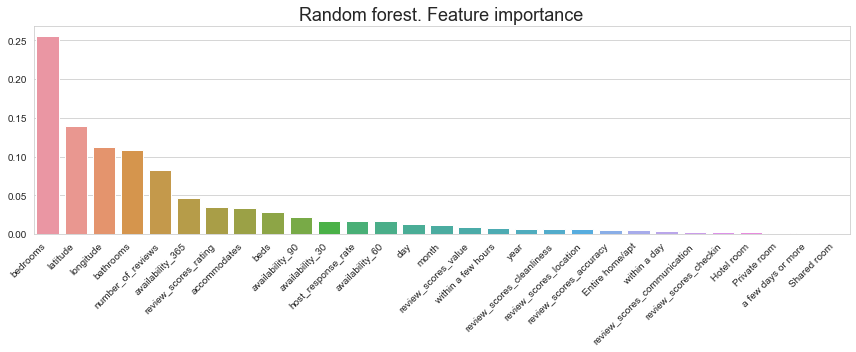

In [81]:
# train model using training dataset.
forest.fit(X_train, y_train)

# Calculate feature importances
importances = forest.feature_importances_

# Visualize Feature Importance
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

plt.figure(figsize = (12, 5))
sns.set_style("whitegrid")
chart = sns.barplot(x = names, y=importances[indices])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Random forest. Feature importance', fontsize=18)
plt.tight_layout()

### Here we can have some useful insights on our model.

 - Number of bedrooms come 1st by importancy for the model.
    
 - Latitude and longitude also play a significal role.

 - Number of bathrooms and number of revious also make an impact on the final predictions.